# Read the dataset and display some information about the dataset (1)

## Import required libraries and read the dataset

### Import Libraries

In [32]:
# import numpy as np
import pandas as pd
# import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from collections import Counter


### Import data

In [33]:
bank_data = pd.read_csv('bank_loan_defaulter.csv')

## Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [34]:
print(bank_data.head())
print(bank_data.shape)
print(bank_data.info())


         ID  Loan Amount  Funded Amount  Funded Amount Investor  Term  \
0  65087372        10000          32236             12329.36286    59   
1   1450153         3609          11940             12191.99692    59   
2   1969101        28276           9311             21603.22455    59   
3   6651430        11170           6954             17877.15585    59   
4  14354669        16890          13226             13539.92667    59   

  Batch Enrolled  Interest Rate Grade Sub Grade Employment Duration  ...  \
0     BAT2522922      11.135007     B        C4            MORTGAGE  ...   
1     BAT1586599      12.237563     C        D3                RENT  ...   
2     BAT2136391      12.545884     F        D4            MORTGAGE  ...   
3     BAT2428731      16.731201     C        C3            MORTGAGE  ...   
4     BAT5341619      15.008300     C        D4            MORTGAGE  ...   

    Recoveries Collection Recovery Fee Collection 12 months Medical  \
0     2.498291                0.7

# Data cleansing and Exploratory data analysis (3)

## Check if there are any duplicate records in the dataset? if any drop them

In [35]:
print(bank_data.duplicated().sum())
bank_data = bank_data.drop_duplicates()


0


## check the percentage of missing values, if any? treat them with appropriate methods.

In [36]:
print(bank_data.isnull().sum())
print(bank_data.isnull().sum()/bank_data.shape[0]*100)


ID                              0
Loan Amount                     0
Funded Amount                   0
Funded Amount Investor          0
Term                            0
Batch Enrolled                  0
Interest Rate                   0
Grade                           0
Sub Grade                       0
Employment Duration             0
Home Ownership                  0
Verification Status             0
Payment Plan                    0
Loan Title                      0
Debit to Income                 0
Delinquency - two years         0
Inquires - six months           0
Open Account                    0
Public Record                   0
Revolving Balance               0
Revolving Utilities             0
Total Accounts                  0
Initial List Status             0
Total Received Interest         0
Total Received Late Fee         0
Recoveries                      0
Collection Recovery Fee         0
Collection 12 months Medical    0
Application Type                0
Last week Pay 

## Check summary statistics of the dataset, and write your key observations.

In [37]:
print(bank_data.describe())
print(bank_data.describe(include='O'))


                 ID   Loan Amount  Funded Amount  Funded Amount Investor  \
count  6.746300e+04  67463.000000   67463.000000            67463.000000   
mean   2.562761e+07  16848.902776   15770.599114            14621.799323   
std    2.109155e+07   8367.865726    8150.992662             6785.345170   
min    1.297933e+06   1014.000000    1014.000000             1114.590204   
25%    6.570288e+06  10012.000000    9266.500000             9831.684984   
50%    1.791565e+07  16073.000000   13042.000000            12793.682170   
75%    4.271521e+07  22106.000000   21793.000000            17807.594120   
max    7.224578e+07  35000.000000   34999.000000            34999.746430   

               Term  Interest Rate  Home Ownership  Debit to Income  \
count  67463.000000   67463.000000    67463.000000     67463.000000   
mean      58.173814      11.846258    80541.502522        23.299241   
std        3.327441       3.718629    45029.120366         8.451824   
min       36.000000       5.320

## Drop the columns which you think redundant for the analysis

In [38]:
bank_data = bank_data.drop(['ID', 'Batch Enrolled', 'Payment Plan', 'Loan Title', 
                            'Employment Duration', 
                            'Home Ownership', 'Loan Title', 
                            'Initial List Status', 'Recoveries', 
                            'Collection Recovery Fee', 
                            'Collection 12 months Medical'], axis=1)


## Perform necessary univariate and multivariate analysis.

### Univariate Analysis

In [39]:
bank_data['Loan Amount'].value_counts()


15932    13
14424    12
15800    11
15639    11
15118    11
         ..
2588      1
33968     1
5420      1
12285     1
8323      1
Name: Loan Amount, Length: 27525, dtype: int64

<AxesSubplot: >

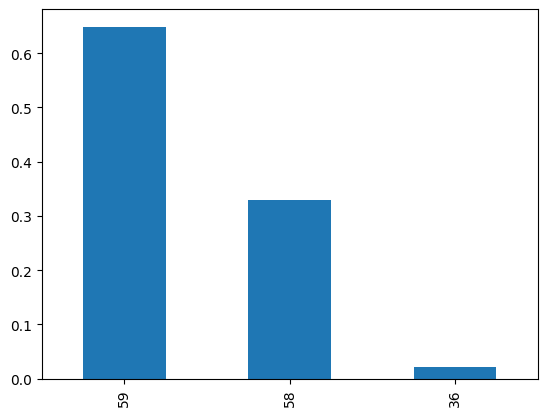

In [40]:
bank_data['Term'].value_counts(normalize=True).plot.bar()


In [41]:
bank_data['Interest Rate'].value_counts()


6.191126     2
8.637499     2
9.996611     2
9.530343     2
11.978370    2
            ..
12.052329    1
16.739702    1
7.406152     1
19.632720    1
16.034631    1
Name: Interest Rate, Length: 67448, dtype: int64

In [42]:
bank_data['Interest Rate'].describe()


count    67463.000000
mean        11.846258
std          3.718629
min          5.320006
25%          9.297147
50%         11.377696
75%         14.193533
max         27.182348
Name: Interest Rate, dtype: float64

In [43]:
bank_data['Debit to Income'].value_counts()


24.977361    2
22.368527    2
18.792519    2
35.467099    2
24.505453    2
            ..
27.764362    1
35.819821    1
30.352185    1
27.560373    1
16.052112    1
Name: Debit to Income, Length: 67454, dtype: int64

In [44]:
bank_data['Debit to Income'].describe()


count    67463.000000
mean        23.299241
std          8.451824
min          0.675299
25%         16.756416
50%         22.656658
75%         30.048400
max         39.629862
Name: Debit to Income, dtype: float64

<AxesSubplot: >

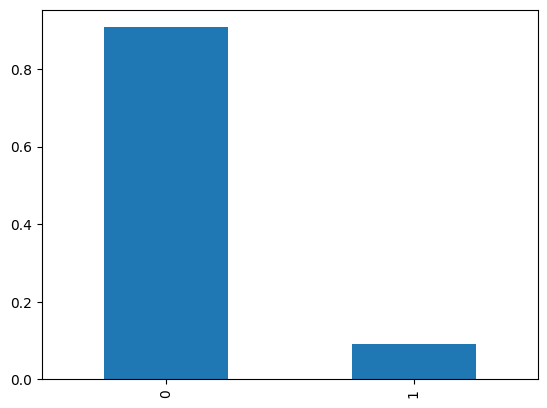

In [45]:
bank_data['Loan Status'].value_counts(normalize=True).plot.bar()


### Multivariate Analysis

## Check the distribution of the target column 'Loan Status', and comment on the class distribution

In [46]:
print(bank_data['Loan Status'].value_counts())
print(bank_data['Loan Status'].value_counts()/bank_data.shape[0]*100)


0    61222
1     6241
Name: Loan Status, dtype: int64
0    90.749003
1     9.250997
Name: Loan Status, dtype: float64


- It appears that there is only about a 10% loan defaulter rate. 

# Data preparation for model building (5)

## Segregate the target and independent features.

In [47]:
X = bank_data.drop('Loan Status', axis=1)
y = bank_data['Loan Status']


## Encode the categorical data.

In [48]:
le = LabelEncoder()
X['Grade'] = le.fit_transform(X['Grade'])
X['Sub Grade'] = le.fit_transform(X['Sub Grade'])
X['Verification Status'] = le.fit_transform(X['Verification Status'])
X['Application Type'] = le.fit_transform(X['Application Type'])

X_unbalanced = X.copy()
y_unbalanced = y.copy()


## Handle the imbalanced data using oversampling or under sampling approach, and check the distribution of the re-sampled target class.


In [49]:
smote = SMOTE(sampling_strategy=0.5)
X, y = smote.fit_resample(X, y)
print(Counter(y))


Counter({0: 61222, 1: 30611})


## Select the K best features using wrapper or embedded methods.

In [50]:
print(X.shape)

(91833, 24)


In [51]:
clf = ExtraTreesClassifier()
clf = clf.fit(X, y)
print(clf.feature_importances_)


[0.05102549 0.05115499 0.05001895 0.03824877 0.05199133 0.040167
 0.05085027 0.04288974 0.05861305 0.02374858 0.01291737 0.04898669
 0.01057637 0.05014251 0.05376529 0.04906948 0.05177225 0.05552004
 0.00042546 0.05954465 0.         0.04616787 0.05225526 0.05014859]


In [52]:
model = SelectFromModel(clf, prefit=True)
X = model.transform(X)
print(X.shape)


(91833, 17)


c:\Users\jayan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


## Split the data into train and test

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)


# Model Building and evaluation (5)

## Build a base model using the Original Imbalanced data.

In [54]:
logreg = LogisticRegression()
X_unbalanced_train, X_unbalanced_test, y_unbalanced_train, y_unbalanced_test = train_test_split(
    X_unbalanced, y_unbalanced, test_size=0.3, random_state=42)
logreg.fit(X_unbalanced_train, y_unbalanced_train)
y_unbalanced_pred = logreg.predict(X_unbalanced_test)
print("Accuracy Score: ", accuracy_score(y_unbalanced_test, y_unbalanced_pred), "\n")
print("Confusion Matrix: \n", confusion_matrix(
    y_unbalanced_test, y_unbalanced_pred), "\n")
print("Classification Report: \n", classification_report(
    y_unbalanced_test, y_unbalanced_pred), "\n")


Accuracy Score:  0.9084440930876031 

Confusion Matrix: 
 [[18386     0]
 [ 1853     0]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      1.00      0.95     18386
           1       0.00      0.00      0.00      1853

    accuracy                           0.91     20239
   macro avg       0.45      0.50      0.48     20239
weighted avg       0.83      0.91      0.86     20239
 



c:\Users\jayan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\jayan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jayan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:134

## Try multiple models and tune their hyperparameters with appropriate methods and report the best performing model

### Random Forest - Hyperparameter Tuning

In [55]:
# rf = RandomForestClassifier()
# param_grid = {'n_estimators': [100, 200, 300, 400, 500],
#               'max_depth': [5, 10, 15, 20, 25, 30],
#               'min_samples_split': [2, 5, 10, 15, 100],
#               'min_samples_leaf': [1, 2, 5, 10]}
# grid_search = GridSearchCV(
#     estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
# grid_search.fit(X_train, y_train)
# print(grid_search.best_params_)
# print(grid_search.best_score_)


- The best parameeters came out to be: ['max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200]
- With score: 0.7386006592198967

In [56]:
rf = RandomForestClassifier(
    n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_depth=20)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Accuracy Score: ", accuracy_score(y_test, y_pred), '\n')
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred), '\n')
print("Classification Report: \n", classification_report(y_test, y_pred), '\n')


Accuracy Score:  0.7749909255898366 

Confusion Matrix: 
 [[16756  1626]
 [ 4573  4595]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.91      0.84     18382
           1       0.74      0.50      0.60      9168

    accuracy                           0.77     27550
   macro avg       0.76      0.71      0.72     27550
weighted avg       0.77      0.77      0.76     27550
 



### SVM - Hyperparameter Tuning

In [ ]:
# svc = SVC()
# param_grid = {'C': [0.1, 1, 10, 100, 1000],
#               'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
#               'kernel': ['rbf']}
# grid_search = GridSearchCV(
#     estimator=svc, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
# grid_search.fit(X_train, y_train)
# print(grid_search.best_params_)
# print(grid_search.best_score_)



- The best parameters came out to be: ['C': 10, 'gamma': 0.0001, 'kernel': 'rbf']
- With score: 0.6718000937627601

In [57]:
# svc = SVC(C=10, gamma=0.0001, kernel='rbf')
# svc.fit(X_train, y_train)
# y_pred = svc.predict(X_test)
# print("Accuracy Score: ", accuracy_score(y_test, y_pred), '\n')
# print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred), '\n')
# print("Classification Report: \n", classification_report(y_test, y_pred), '\n')


Accuracy Score:  0.6823230490018148 

Confusion Matrix: 
 [[18382     0]
 [ 8752   416]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.68      1.00      0.81     18382
           1       1.00      0.05      0.09      9168

    accuracy                           0.68     27550
   macro avg       0.84      0.52      0.45     27550
weighted avg       0.78      0.68      0.57     27550
 



- SVM model took >192 mins to run, hence it is commented out. 
- Output: 

Accuracy Score:  0.6823230490018148 

Confusion Matrix: 
 [[18382     0]
 [ 8752   416]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.68      1.00      0.81     18382
           1       1.00      0.05      0.09      9168

    accuracy                           0.68     27550
   macro avg       0.84      0.52      0.45     27550
weighted avg       0.78      0.68      0.57     27550

### KNN - Hyperparameter Tuning

In [ ]:
# knn = KNeighborsClassifier()
# param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
#               'weights': ['uniform', 'distance'],
#               'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
# grid_search = GridSearchCV(
#     estimator=knn, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# grid_search.fit(X_train[:5000], y_train[:5000])
# print(grid_search.best_params_)
# print(grid_search.best_score_)


- The best parameeters came out to be: ['algorithm': 'auto', 'n_neighbors': 17, 'weights': 'distance']
- With score: 0.6755986137706432

In [58]:
knn = KNeighborsClassifier(
    n_neighbors=17, weights='distance', algorithm='auto')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy Score: ", accuracy_score(y_test, y_pred), '\n')
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred), '\n')
print("Classification Report: \n", classification_report(y_test, y_pred), '\n')


Accuracy Score:  0.8113611615245009 

Confusion Matrix: 
 [[14586  3796]
 [ 1401  7767]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.79      0.85     18382
           1       0.67      0.85      0.75      9168

    accuracy                           0.81     27550
   macro avg       0.79      0.82      0.80     27550
weighted avg       0.83      0.81      0.82     27550
 



### Decision Tree - Hyperparameter Tuning

In [ ]:
# dt = DecisionTreeClassifier()
# param_grid = {'criterion': ['gini', 'entropy'],
#               'splitter': ['best', 'random'],
#               'max_depth': [5, 10, 15, 20, 25, 30],
#               'min_samples_split': [2, 5, 10, 15, 100],
#               'min_samples_leaf': [1, 2, 5, 10]}
# grid_search = GridSearchCV(
#     estimator=dt, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
# grid_search.fit(X_train, y_train)
# print(grid_search.best_params_)
# print(grid_search.best_score_)


- The best parameeters came out to be: ['criterion': 'entropy', 'max_depth': 25, 'min_samples_leaf': 10, 'min_samples_split': 100, 'splitter': 'best']
- With score: 0.6960008958592435

In [59]:
dt = DecisionTreeClassifier(criterion='entropy', splitter='random',
                            min_samples_split=2, min_samples_leaf=1, max_depth=30)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print("Accuracy Score: ", accuracy_score(y_test, y_pred), '\n')
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred), '\n')
print("Classification Report: \n", classification_report(y_test, y_pred), '\n')


Accuracy Score:  0.6810889292196007 

Confusion Matrix: 
 [[13307  5075]
 [ 3711  5457]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.72      0.75     18382
           1       0.52      0.60      0.55      9168

    accuracy                           0.68     27550
   macro avg       0.65      0.66      0.65     27550
weighted avg       0.69      0.68      0.69     27550
 



# Pipeline (5)

## Build a pipeline and put all the possible steps in the pipeline and fit the pipeline on train data and get predictions on the test data.

In [62]:

pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('pca', PCA(n_components=2)),
                    ('clf', LogisticRegression(random_state=1))])
param_grid = [{'clf__penalty': ['l2'],
               'clf__C': [0.1, 1, 10, 100, 1000],
               'clf__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
               'clf__max_iter': [100, 1000, 2500, 5000]}]
gs = GridSearchCV(estimator=pipe_lr, param_grid=param_grid,
                  scoring='accuracy', cv=3, n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)
print(gs.best_estimator_)
clf = gs.best_estimator_
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


0.6662881346660586
{'clf__C': 0.1, 'clf__max_iter': 5000, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}
Pipeline(steps=[('scl', StandardScaler()), ('pca', PCA(n_components=2)),
                ('clf',
                 LogisticRegression(C=0.1, max_iter=5000, random_state=1,
                                    solver='liblinear'))])
0.6662068965517242
[[18331    51]
 [ 9145    23]]
              precision    recall  f1-score   support

           0       0.67      1.00      0.80     18382
           1       0.31      0.00      0.00      9168

    accuracy                           0.67     27550
   macro avg       0.49      0.50      0.40     27550
weighted avg       0.55      0.67      0.54     27550



# Conclusion (1)